In [1]:
#importing required libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#loading datasets
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
x_train.shape

170498071/170498071 [==============================] - 4s 0us/step


(50000, 32, 32, 3)

In [3]:
x_test.shape

(10000, 32, 32, 3)

In [4]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [5]:
y_train[:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

In [6]:
y_train = y_train.reshape(-1,)
y_train[:10]

array([6, 9, 9, 4, 1, 1, 2, 7, 8, 3], dtype=uint8)

In [7]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [8]:
classes[8]

'ship'

### Data visualization

In [9]:
def plot_sample(x, y, index):
  plt.figure(figsize = (15,2))
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])

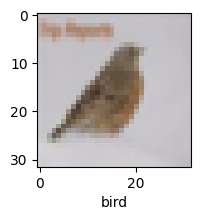

In [10]:
plot_sample(x_train, y_train, 108)

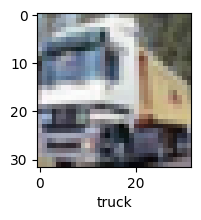

In [11]:
plot_sample(x_train, y_train, 1)

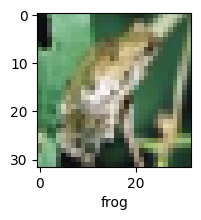

In [12]:
plot_sample(x_train, y_train, 6893)

In [13]:
x_train = x_train / 255
x_test = x_test / 255

## Simple Neural Network (ANN)

In [14]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

ann.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 10s 5ms/step - loss: 1.8120 - accuracy: 0.3554
Epoch 2/5
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6222 - accuracy: 0.4278
Epoch 3/5
1563/1563 [==============================] - 7s 5ms/step - loss: 1.5409 - accuracy: 0.4565
Epoch 4/5
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4820 - accuracy: 0.4773
Epoch 5/5
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4331 - accuracy: 0.4968


In [15]:
ann.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.4600 - accuracy: 0.4856


[1.4600087404251099, 0.48559999465942383]

In [17]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 1s 2ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.44      0.68      0.53      1000
           1       0.56      0.67      0.61      1000
           2       0.36      0.42      0.38      1000
           3       0.37      0.36      0.36      1000
           4       0.46      0.38      0.42      1000
           5       0.46      0.31      0.37      1000
           6       0.64      0.34      0.44      1000
           7       0.51      0.59      0.55      1000
           8       0.66      0.54      0.59      1000
           9       0.53      0.58      0.55      1000

    accuracy                           0.49     10000
   macro avg       0.50      0.49      0.48     10000
weighted avg       0.50      0.49      0.48     10000



## using CNN

In [20]:
cnn = models.Sequential([
    #cnn
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    #dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [21]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 12s 5ms/step - loss: 1.4580 - accuracy: 0.4755
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1135 - accuracy: 0.6085
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9834 - accuracy: 0.6559
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8984 - accuracy: 0.6861
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8332 - accuracy: 0.7095
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7788 - accuracy: 0.7296
Epoch 7/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7331 - accuracy: 0.7437
Epoch 8/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.6892 - accuracy: 0.7593
Epoch 9/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6525 - accuracy: 0.7722
Epoch 10/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.

In [23]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9312 - accuracy: 0.7017


[0.9312453866004944, 0.70169997215271]

In [26]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [27]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

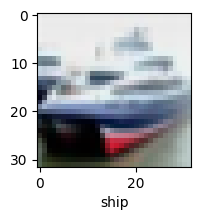

In [39]:
plot_sample(x_test, y_test, 1)

In [33]:
y_pred = cnn.predict(x_test)
y_pred[:5]

313/313 [==============================] - 2s 4ms/step


array([[4.04504226e-06, 7.08151265e-06, 3.02437285e-04, 7.57951319e-01,
        1.46425809e-05, 2.39666909e-01, 1.88251399e-03, 6.50201264e-06,
        1.63793986e-04, 7.91181662e-07],
       [3.59815567e-05, 1.86765231e-02, 5.16682652e-09, 7.26976257e-09,
        6.86835831e-12, 1.50983970e-09, 4.56925166e-12, 7.79811458e-12,
        9.81284857e-01, 2.58911837e-06],
       [1.32631799e-02, 4.53532338e-01, 2.70933757e-04, 1.05952378e-03,
        5.77086503e-05, 4.32358414e-04, 3.11835684e-05, 3.71432106e-04,
        5.04850507e-01, 2.61308420e-02],
       [9.82836545e-01, 1.19405406e-04, 5.51166758e-03, 1.96515721e-05,
        8.27490003e-05, 1.78719489e-07, 1.29755492e-07, 8.39884706e-07,
        1.14283180e-02, 6.01627676e-07],
       [7.09140807e-07, 1.08114045e-06, 2.46595647e-02, 3.00369263e-02,
        2.56699294e-01, 8.59551132e-03, 6.79952562e-01, 5.36749103e-05,
        7.00659882e-07, 3.26906395e-08]], dtype=float32)

In [45]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:15] #predicted values

[3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9]

In [46]:
y_test[:15] #actual values

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9], dtype=uint8)

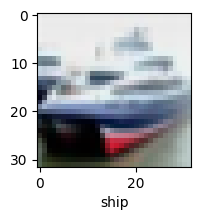

In [40]:
plot_sample(x_test, y_test, 1)

In [38]:
classes[y_classes[1]]

'ship'

In [47]:
print("Classification Report: \n", classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.71      0.76      0.74      1000
           1       0.80      0.81      0.81      1000
           2       0.61      0.58      0.59      1000
           3       0.56      0.48      0.51      1000
           4       0.65      0.66      0.66      1000
           5       0.57      0.68      0.62      1000
           6       0.80      0.72      0.76      1000
           7       0.73      0.78      0.75      1000
           8       0.78      0.80      0.79      1000
           9       0.81      0.75      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000

